## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a></a>
#### Part I - Probability

To get started, let's import our libraries.

In [8]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [9]:
df = pd.read_csv('dataset/ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [10]:
df.user_id.count()

294478

c. The number of unique users in the dataset.

In [11]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [12]:
# Get dataframe with all converted records
converted_df = df.query('converted == 1')

converted_ctr = converted_df.user_id.count() / df['user_id'].count()

# Display click through rate
round(converted_ctr,4)

print("The proportion of users converted is", round(converted_ctr,4))



The proportion of users converted is 0.1197


e. The number of times the `new_page` and `treatment` don't match

In [13]:
#number_times_df = df.query('group == "treatment" and landing_page != "new_page"')
number_times_df = df.query('(group == "treatment" and landing_page != "new_page") or (group == "control" and landing_page != "old_page")')
number_times_df.count()

print("The number of times the new_page and treatment don't match", number_times_df.user_id.count())


The number of times the new_page and treatment don't match 3893


f. Do any of the rows have missing values?

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


Answer (f.) There is no missing values in this dataset

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [15]:
df2 = df.query('(group == "treatment" and landing_page == "new_page") or (group == "control" and landing_page == "old_page")')
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [16]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [17]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [18]:
dfduplicated = df2[df2.user_id.duplicated(keep=False)]
dfduplicated

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [19]:
dfduplicated

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [20]:
 df2.drop_duplicates(subset="user_id", keep='first', inplace=False)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
# Get dataframe with all converted records
converted_df = df.query('converted == 1')

converted_ctr = converted_df.user_id.count() / df['user_id'].count()

# Display click through rate

print("The probability of an individual converting regardless of the page they received is", round(converted_ctr,4))

The probability of an individual converting regardless of the page they received is 0.1197


b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
# Given that an individual was in the control group, the probability of converting.
control_df = df.query('group == "control"')

# Compute click through rate for experiment group
control_ctr = control_df.query('converted == 1').user_id.count() / control_df.user_id.count()

# Display click through rate

print("The conversion probability of an individual in the control group is", round(control_ctr,4))

The conversion probability of an individual in the control group is 0.1204


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
# Given that an individual was in the treatment group, the probability of converting.
treatment_df = df.query('group == "treatment"')

# Compute click through rate for experiment group
control_ctr = treatment_df.query('converted == 1').user_id.count() / treatment_df.user_id.count()

# Display click through rate

print("The conversion probability of an individual in the treatment group is", round(control_ctr,4))

The conversion probability of an individual in the treatment group is 0.1189


d. What is the probability that an individual received the new page?

In [24]:

new_page_df = float(df2.query('landing_page == "new_page"')['user_id'].nunique())
newpage = new_page_df/float(df2.shape[0])
print("The probability that an individual received the new page is", round(newpage,4))

The probability that an individual received the new page is 0.5001


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answers**

a. The probability of an individual converting regardless of the page they received is **0.1197**

b. The conversion probability of an individual in the control group is **0.1204**

c. The conversion probability of an individual in the treatment group is **0.1189**

d. The probability that an individual received the new page is **0.5001**

e. Due to the conversion probability of an individual in both control and treatment groups is **quite similar**, I'd say to find another techniques to re-evaluate the new page performance. 

<a></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} &lt;= 0 $$  
$$H_1: p_{new} - p_{old} &gt;  0 $$  


 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [25]:
p_new = round(df2.converted.mean(),4)
p_new

0.1196

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [26]:
p_old = round(df2.converted.mean(),4)
p_old

0.1196

c. What is $n_{new}$?

In [27]:
n_new = df2.query("landing_page == 'new_page'")['converted'].count()
n_new


145311

d. What is $n_{old}$?

In [28]:
n_old = df2.query('landing_page == "old_page"')['converted'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted.mean()

0.11970876258507615

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted.mean()

0.11980120324352603

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
diff = new_page_converted.mean() - old_page_converted.mean()
diff

-9.244065844987714e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [32]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    
    # append the info   
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    
# or use this script 
#new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
#old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
#p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

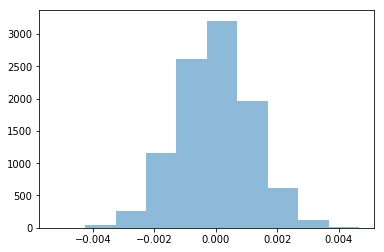

In [33]:
p_diffs = np.array(p_diffs)

plt.hist(p_diffs, alpha = 0.5); 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
control_converted = df2.query('group == "control"')['converted'].mean()
treatment_converted = df2.query('group == "treatment"')['converted'].mean()
actual_diff = treatment_converted - control_converted
actual_diff
print("Actual difference observed:", round(actual_diff,4))

print("Proportion of p_diffs greater than the actual difference observed is:",format((p_diffs > actual_diff).mean()))

Actual difference observed: -0.0016
Proportion of p_diffs greater than the actual difference observed is: 0.9033


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**

If p-value &lt;= 0.05 (alpha) -&gt; reject the null hypotheses

If p-value &gt; 0.05 (alpha) -&gt; fail to reject the null hypotheses

Since the p-value is greater than 0.05 (0.8976), we **fail to reject the null hypotheses** and do NOT have statistically evidence that suggests the new page converts better, as well.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").user_id.count()
convert_new =  df2.query("landing_page == 'new_page' and converted == 1").user_id.count()
n_old = df2.query("landing_page == 'old_page'").user_id.count()
n_new = df2.query("landing_page == 'new_page'").user_id.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [36]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], value=None, alternative='smaller', prop_var=False)
z_score, p_value

(1.3116075339133115, 0.905173705140591)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**

While The p-value is a probability, the Z-scores represent standard deviations.

**Confidence Level**

Since:

z-score &lt; -1.65 or &gt; +1.65 and p-value &lt; 0.10 -&gt; generate 90% of Confidence Level

z-score &lt; -1.96 or &gt; +1.96 and p-value &lt; 0.05 -&gt; generate 95% of Confidence Level

z-score &lt; -2.58 or &gt; +2.58 and p-value &lt; 0.01 -&gt; generate 99% of Confidence Level

Since the std deviation is small while p-value is quite large and the confidence level is not higher enough, we didn't evolve the conclusion from the statsmodels result, even the p-value result (~0.9) continues suggesting null hypotheses rejection or the old page statistically generated better conversion than the new page.

<a></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the previous A/B test can also be achieved by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**

Since the aim is to predict 1 of 2 possible outcomes: whether a user will convert or not depending on the page (old or new), we should use **Logistic Regression**. 


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df2['intercept'] = 1
df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
df2.head()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,1,0


In [38]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [39]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Tue, 05 May 2020   Pseudo R-squ.:               8.085e-06
Time:                        13:57:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
np.exp(-0.0150)

0.9851119396030626

The ab_page conversion is 0.98 times as likely holding all else constant 

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer**

The p-value for ab_page is: 0.19

The reason p-values differ from Part II is because in the A/B test the old page is greater or or equal to the new page (one-tailed). Logistic Regression is a two-tailed test and p-values have a different meaning relating to slope, as well.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**

Since results of the statistical models do not have strong evidence of the null or alternative hypothesis rejection, I'd say it's a good idea to consider other correlated factors and variables.

There are N factors to consider whether or not an individual converts, such as Landing-Page Layout, Alignment of the Value proposition and target public related to cause and effect.

The reason p-values differ from Part II is because in the A/B test the old page is greater or or equal to the new page (one-tailed). 
Logistic Regression is a two-tailed test and p-values have a different meaning relating to slope, as well.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [41]:
countries_df = pd.read_csv('dataset/countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head(5)

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page
user_id,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,1,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1


In [44]:
df_new.country.unique()

array(['US', 'UK', 'CA'], dtype=object)

In [45]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page,CA,UK,US
user_id,,,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,1,1,0,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1,0,0,1


In [46]:
df_new.describe()

,converted,intercept,new_page,old_page,control,ab_page,CA,UK,US
count,290585.000000,290585.0,290585.000000,290585.000000,290585.000000,290585.000000,290585.000000,290585.000000,290585.000000
mean,0.119597,1.0,0.500064,0.499936,0.499936,0.500064,0.049896,0.249380,0.700724
std,0.324490,0.0,0.500001,0.500001,0.500001,0.500001,0.217730,0.432655,0.457942
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [47]:
### Fit Your Linear Model And Obtain the Results
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Tue, 05 May 2020   Pseudo R-squ.:               1.521e-05
Time:                        13:58:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

In [48]:
np.exp(-0.0408), np.exp(0.0507)

(0.9600211149716509, 1.052007243765014)

US is 1.04 times MORE likely to convert

UK us 1.05 times MORE likely to convert

In [49]:
### Fit Your Linear Model And Obtain the Results
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Tue, 05 May 2020   Pseudo R-squ.:               1.521e-05
Time:                        13:58:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.315      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [50]:
### Fit Your Linear Model And Obtain the Results
np.exp(-0.0408), np.exp(0.0099)

(0.9600211149716509, 1.0099491671175422)

CA is 0.96 times MORE likely to convert

UK us 1.00 times MORE likely to convert

In [51]:
### Analysing interactions between variables
df_new['UK_new_page'] = df_new['UK']*df_new['ab_page']
df_new['US_new_page'] = df_new['US']*df_new['ab_page']
df_new['CA_new_page'] = df_new['CA']*df_new['ab_page']
df_new.head()


,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page,CA,UK,US,UK_new_page,US_new_page,CA_new_page
user_id,,,,,,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1,0,0,1,0,1,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1,0,0,1,0,1,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,1,1,0,0,0,1,0,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1,0,0,1,0,1,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1,0,0,1,0,1,0


In [52]:

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'US_new_page', 'UK_new_page']])
results = logit_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Tue, 05 May 2020   Pseudo R-squ.:               1.083e-05
Time:                        14:04:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.3160
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9926      0.008   -252.910      0.000      -2.008      -1.977
US_new_page    -0.0144      0.012     -1.156      0.248      -0.039       0.010
UK_new_page     0.0112      0.018      0.626      0.532      -0.024       0.046
===============================================================================
"""

In [53]:
np.exp(-0.0144), np.exp(0.0112)

(0.985703184122443, 1.011262954811771)

US is 0.98 times MORE likely to convert

UK us 1.01 times MORE likely to convert

In [55]:
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA_new_page', 'UK_new_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Tue, 05 May 2020   Pseudo R-squ.:               2.364e-05
Time:                        14:11:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.08085
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9963      0.006   -322.050      0.000      -2.008      -1.984
CA_new_page    -0.0752      0.038     -1.997      0.046      -0.149      -0.001
UK_new_page     0.0149      0.017      0.862      0.389      -0.019       0.049
===============================================================================
"""

In [56]:
np.exp(-0.0752), np.exp(0.0149)

(0.92755795618492, 1.0150115583846535)

CA is 0.92 times MORE likely to convert

UK us 1.01 times MORE likely to convert

**Part III Conclusion**

Although the result of the new page in the UK is higher than the US and CA that have quite similar results each other, this independent variable doesn't seem to be a factor that has big impact on the conversion as the result is quite similar for all of the considered countries with a brief advantage to UK.



**Final Conclusion**

Considering the overall result, we could not conclude that the new page conversion is greater than the old page due to fail to reject the null hypotheses. We also could not conclude that the old page has a relevant conversion compared to the new page due to similarity conversion between new and old page.


<a></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -&gt; Download as -&gt; HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install &lt;module_name&gt;` (don't include the "&lt;" or "&gt;" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.&lt;/module_name&gt;